# More Machine Learning

### BUSI 520 - Python for Business Research
### Kerry Back, JGSB, Rice University

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Example data

In [2]:
# Generate 50 features (predictors)
np.random.seed(0)
X = pd.DataFrame(
    np.random.normal(size=(100, 50))
)

# Some noise
noise = np.random.normal(size=100)

# Regression target
yr = X[0] + noise

# Binary target
yb = 1*(yr > 0)

# Multi-class target
ym = 1*(yr > -1) + 1*(yr > 1)

In [3]:
from sklearn.model_selection import train_test_split
Xb_train, Xb_test, yb_train, yb_test = train_test_split(
    X, yb, 
    test_size=0.2, 
    random_state=0
)

from sklearn.model_selection import train_test_split
Xm_train, Xm_test, ym_train, ym_test = train_test_split(
    X, ym, 
    test_size=0.2, 
    random_state=0
)

from sklearn.model_selection import train_test_split
Xr_train, Xr_test, yr_train, yr_test = train_test_split(
    X, yr, 
    test_size=0.2, 
    random_state=0
)

## Logit

Choose parameters to maximize fit of 
$$ \frac{1}{1+e^{-\sum \beta_i x_i}}$$
to the dummy variable.

* Scikit-learn's logistic regression can accomodate an $\ell^1$ penalty (lasso) or an $\ell^2$ penalty (ridge) or both (elastic net). 
* Specify penalty="l1", penalty="l2", penalty="elasticnet", or penalty="none."  
* The default imposes an $\ell^2$ penalty.  

* If penalty = "l1", specify solver (e.g., "saga").
* If penalty="elasticnet", specify l1_ratio and solver="saga."  
* The size of the penalty is inverse to the parameter C.
* The score for logistic regression is the fraction of correct predictions.  

In [4]:
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression(penalty="l1", C=0.1, solver="saga")
model1.fit(Xb_train, yb_train)
score_train = model1.score(Xb_train, yb_train)
score_test = model1.score(Xb_test, yb_test)
print("fraction of correct predictions on training data is", score_train)
print("fraction of correct predictions on test data is", score_test)
model1.coef_

fraction of correct predictions on training data is 0.775
fraction of correct predictions on test data is 0.75


array([[0.81212582, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ]])

In [5]:
model2 = LogisticRegression(penalty="l1", C=10, solver="saga")
model2.fit(Xb_train, yb_train)
score_train = model2.score(Xb_train, yb_train)
score_test = model2.score(Xb_test, yb_test)
print("fraction of correct predictions on training data is", score_train)
print("fraction of correct predictions on test data is", score_test)
model2.coef_

fraction of correct predictions on training data is 1.0
fraction of correct predictions on test data is 0.75


c:\Users\kerry\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


array([[ 4.39484914,  0.70602202, -0.00976995, -0.95366401, -0.56172954,
         0.70037444, -0.68074406, -0.48295366, -0.29018539,  0.00463586,
         0.55071787, -0.29725181, -1.15324176,  1.49022276, -0.1683152 ,
        -0.14891732, -0.33110891, -0.07961488, -0.58525715,  0.08778821,
        -1.06723425,  0.13855838,  0.25251624, -0.3314787 , -1.05678255,
        -0.13192985,  0.03917435,  0.33361992, -1.19925872,  0.69104033,
         0.89930758,  0.96306877, -0.64733895, -0.93188081, -0.39631996,
         0.26691888, -0.04563392, -0.32488566,  0.87030211,  0.05369104,
         1.91678787,  0.89243369, -0.43012215,  0.75254286, -1.15978466,
        -0.76464907, -0.7606832 , -0.04347331, -0.2423112 , -0.1362384 ]])

In [7]:
model1.predict(Xb_test)

array([0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0])

* predicted probabilities (for y=0 and y=1) 
* prediction is 0 if predicted prob for y=0 is > 1/2

In [10]:
model1.predict_proba(Xb_test)

array([[0.79577461, 0.20422539],
       [0.50674884, 0.49325116],
       [0.20686297, 0.79313703],
       [0.7164633 , 0.2835367 ],
       [0.6315142 , 0.3684858 ],
       [0.37458425, 0.62541575],
       [0.2767514 , 0.7232486 ],
       [0.48704699, 0.51295301],
       [0.85064424, 0.14935576],
       [0.74601464, 0.25398536],
       [0.4826039 , 0.5173961 ],
       [0.2213151 , 0.7786849 ],
       [0.68433994, 0.31566006],
       [0.48810558, 0.51189442],
       [0.69125581, 0.30874419],
       [0.54355521, 0.45644479],
       [0.74696746, 0.25303254],
       [0.7136915 , 0.2863085 ],
       [0.34993452, 0.65006548],
       [0.66186093, 0.33813907]])

## Exercise

Run GridSearchCV on the training data to find the best $C$ in (0.001, 0.01, 0.1, 1, 10, 100) for logit with an $\ell^1$ penalty.

### Confusion matrix

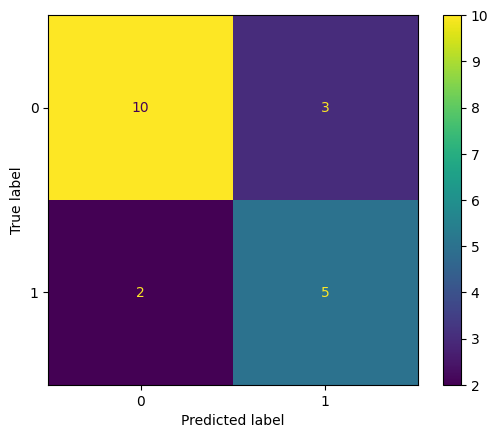

In [11]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(
    estimator=model1, 
    X=Xb_test, 
    y=yb_test
)

### ROC curve

* ROC = Receiver Operating Characteristics (not sure why).  
* In binary classification, we can vary the threshold to change the frequency of "positive" predictions (in our case, positive = return above median).  
* Hopefully, we can increase the number of true positives without increasing the number of false positives too much.  
* This corresponds to an ROC curve above the 45 degree line.  

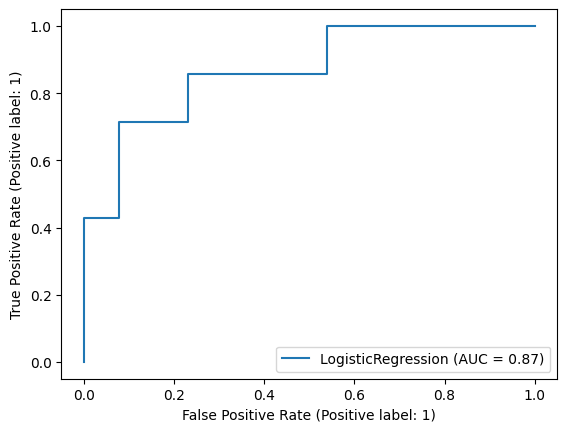

In [12]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(
    estimator=model1, 
    X=Xb_test, 
    y=yb_test, 
)
plt.show()

### Multi-class classification

In [13]:
model = LogisticRegression(penalty="l1", C=0.1, solver="saga")
model.fit(Xm_train, ym_train)
score_train = model.score(Xm_train, ym_train)
score_test = model.score(Xm_test, ym_test)
print("fraction of correct predictions on training data is", score_train)
print("fraction of correct predictions on test data is", score_test)

fraction of correct predictions on training data is 0.5375
fraction of correct predictions on test data is 0.55


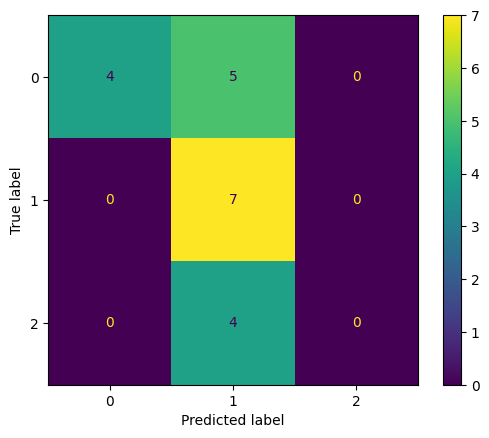

In [14]:
ConfusionMatrixDisplay.from_estimator(estimator=model, X=Xm_test, y=ym_test)

## Decision Trees

* Split dataset into two parts based on some variable > some value or not (Yes or No).
* Split each subset further in the same way
* Continue for max_depth.  Final sets are called leaves.
* For classification, prediction for each observation is the most common type in its leaf.
* For regression, prediction for each observation is the mean value in its leaf.
* In regression, each split is chosen to minimize weighted averages of MSEs.  
* In classification, each split is chosen to minimize weighted average of impurities.

## Impurity measures

* classes $k=1, \ldots, K$
* $p_k = $ frequency of class $k$
* Gini index:
$$ \sum_{k=1}^K p_k(1-p_k)$$
* Entropy:
$$ - \sum_{k=1}^K p_k\log(p_k)$$

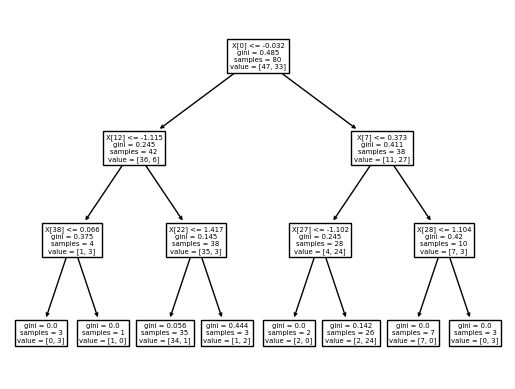

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

model = DecisionTreeClassifier(max_depth=3)
model.fit(Xb_train, yb_train)

plot_tree(model)
plt.show()

## Feature importances

In [16]:
model.feature_importances_,

(array([0.40424775, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.14382079, 0.        , 0.        ,
        0.        , 0.        , 0.10247586, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.07074419, 0.        , 0.        ,
        0.        , 0.        , 0.09950277, 0.13204847, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.04716017, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ]),)

## Exercise

Fit the decision tree classifier on the training data for max_depth in (2, 3, 4, 5, 6) and plot the train and test scores as a function of max_depth.

## Decision tree regressor

In [17]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(
  max_depth=3,
  random_state=0
)
model.fit(Xr_train, yr_train)
score_train = model.score(Xr_train, yr_train)
score_test = model.score(Xr_test, yr_test)
print("R-squared on training data is", score_train)
print("R-squared on test data is", score_test)

R-squared on training data is 0.7841535694978208
R-squared on test data is -0.48772625535569736


## Ensembles

* Combine many weak learners to create a strong learner (hopefully)
* Bagging and boosting are the main strategies.

## Bagging

* Bagging = bootstrap and aggregate
* Bootstrap random samples (draw with replacement from original data)
* Fit estimator to each random sample
* Average estimates
* Bagging decision trees = random forest

## Random forests

* For classification or regression
* Generate bootstrapped data sets.  Fit a decision tree to each.
* For each observation, answer Yes or No questions for each tree to find its leaf and its
prediction in each tree.  
* Average predictions for regression or use most common prediction for classification.


In [18]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
  max_depth=3,
  n_estimators=100,
  random_state=0
)
model.fit(Xb_train, yb_train)
score_train = model.score(Xb_train, yb_train)
score_test = model.score(Xb_test, yb_test)
print("fraction correct on training data is", score_train)
print("fraction correct on test data is", score_test)

fraction correct on training data is 1.0
fraction correct on test data is 0.65


## Random forest regressor

In [19]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(
  max_depth=3,
  n_estimators=100,
  random_state=0
)
model.fit(Xr_train, yr_train)
score_train = model.score(Xr_train, yr_train)
score_test = model.score(Xr_test, yr_test)
print("R-squared on training data is", score_train)
print("R-squared on test data is", score_test)

R-squared on training data is 0.817628313823389
R-squared on test data is 0.41907924542639485


## Exercise

Run GridSearchCV on the training data for RandomForestClassifier to find the best max_depth in (2, 3, 4, 5, 6).

## Boosting

* For regression or classification.
* Fit a decision tree
* Look at the errors and fit another decision tree
* Combine the two trees to form a new model (e.g., average their predictions)
* Look at the errors and fit another tree, etc.


* Gradient boosting: fit a tree to the errors and add the error prediction to the original prediction.
* Adaptive boosting: increase the weight on the misfit observations, fit another tree, and average them.
* XGBoost: optimized version of gradient boosting
* Learning rate: what weight to put on new trees.  Low learning rate avoids oscillation and improves convergence.


In [20]:
from sklearn.ensemble import (
    GradientBoostingRegressor, 
    GradientBoostingClassifier, 
    AdaBoostRegressor, 
    AdaBoostClassifier
)

from xgboost import XGBRegressor, XGBClassifier

In [21]:
model = XGBRegressor(
    max_depth=4,
    learning_rate=0.01,
    n_estimators=100
)
model.fit(Xr_train, yr_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [22]:
score_train = model.score(Xr_train, yr_train)
score_test = model.score(Xr_test, yr_test)
print("R-squared on training data is", score_train)
print("R-squared on test data is", score_test)

R-squared on training data is 0.7765080341299813
R-squared on test data is 0.2969226702834281


## Scikit-learn toy datasets

In [23]:
# binary

from sklearn.datasets import load_breast_cancer
X1, y1 = load_breast_cancer(return_X_y=True)
print(f"(numobs, numfeatures) = {X1.shape}")
print(f"target values are {np.unique(y1)}")

(numobs, numfeatures) = (569, 30)
target values are [0 1]


In [24]:
# multi-class

from sklearn.datasets import load_digits
X2, y2 = load_digits(return_X_y=True)
print(f"(numobs, numfeatures) = {X2.shape}")
print(f"target values are {np.unique(y2)}")

(numobs, numfeatures) = (1797, 64)
target values are [0 1 2 3 4 5 6 7 8 9]


In [25]:
# regression

from sklearn.datasets import load_diabetes
X3, y3 = load_diabetes(return_X_y=True)
print(f"(numobs, numfeatures) = {X3.shape}")
print(f"target values are {np.unique(y3)}")

(numobs, numfeatures) = (442, 10)
target values are [ 25.  31.  37.  39.  40.  42.  43.  44.  45.  47.  48.  49.  50.  51.
  52.  53.  54.  55.  57.  58.  59.  60.  61.  63.  64.  65.  66.  67.
  68.  69.  70.  71.  72.  73.  74.  75.  77.  78.  79.  80.  81.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 107. 108. 109. 110. 111. 113. 114.
 115. 116. 118. 120. 121. 122. 123. 124. 125. 126. 127. 128. 129. 131.
 132. 134. 135. 136. 137. 138. 139. 140. 141. 142. 143. 144. 145. 146.
 147. 148. 150. 151. 152. 153. 154. 155. 156. 158. 160. 161. 162. 163.
 164. 166. 167. 168. 170. 171. 172. 173. 174. 175. 177. 178. 179. 180.
 181. 182. 183. 184. 185. 186. 187. 189. 190. 191. 192. 195. 196. 197.
 198. 199. 200. 201. 202. 206. 208. 209. 210. 212. 214. 215. 216. 217.
 219. 220. 221. 222. 225. 229. 230. 232. 233. 235. 236. 237. 241. 242.
 243. 244. 245. 246. 248. 249. 252. 253. 257. 258. 259. 261. 262. 263.
 264. 265. 268. 270. 272.